Chebyshev coefficients for $e^{-x}$ for $n=1$ from Cody, Meinardus, and Varga (table III)

```
              n = 1
---------------------------------
i   p_i             q_i
---------------------------------
0   1.0669  ( 00)   1.0000  ( 00)
1  -1.1535  (-01)   1.7275  ( 00)
```

In [135]:
from sympy import init_session
init_session()
t = symbols('t', real=True)
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


(From `Maria_Pusa2.pdf`)

Remez algorithm

1. Assume $\left\{t_i \right\}_{i=1}^{2k+2} \subset [−1, 1]$ and find real polynomials $p_k$ and $q_k$ and a parameter $\epsilon > 0$ such
that
$$
\begin{align}
e^{\phi(t_i)} − \frac{p(\phi(t_i))}{q(\phi(t_i))} +(−1)^i\epsilon=0,&& i=1,...,2k+2,\\
\end{align}
$$
where $q_{k+1} = 1$.

2. Assume $r_{k,k} \in \pi_{k,k}$ and $\epsilon > 0$ and find the $2k + 2$ local extreme points of the function
$$
E(t) = e^{\phi(t)} - r_{k,k}(\phi(t))
$$
in the interval $[−1, 1]$.

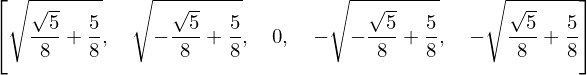

In [2]:
[chebyshevt_root(5, i) for i in range(5)]

In [3]:
[chebyshevt_root(5, i).evalf() for i in range(5)]

In [4]:
chebyshevt(5, x)

In [5]:
epsilon = symbols("epsilon")
p0, p1, q0, q1 = symbols("p0, p1, q0, q1")
i = symbols("i")

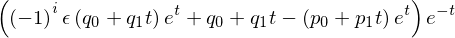

In [6]:
expr = exp(-t) - (p0 + p1*t)/(q0 + q1*t) + (-1)**i*epsilon
expr = expr*(q0 + q1*t)
expr = simplify(expr)
expr

In [7]:
system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(5, 4-j).evalf()}) for j in range(1,5)])

In [8]:
system = system.subs(q0, 1)
system

In [9]:
sols = solve(system, [p0, p1, q1, epsilon], dict=True)
sols

In [10]:
E = exp(-t) - (p0 + p1*t)/(1 + q1*t)

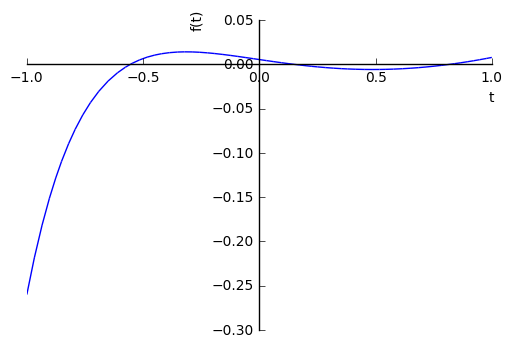

In [11]:
plot(E.subs(sols[0]), (t, -1, 1))

In [12]:
extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), -1), nsolve(diff(E.subs(sols[0]), t), 0), 1]
extreme_x2

[-1, mpf('0.48756333454382529'), mpf('-0.31523643012397814'), 1]

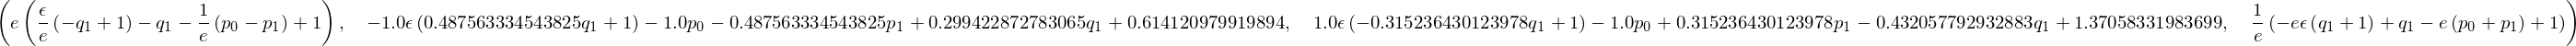

In [13]:
system2 = Tuple(*[expr.subs({i: j, t: extreme_x2[j]}) for j in range(4)]).subs(q0, 1)
system2

In [14]:
sols2 = solve(system2, [p0, p1, q1, epsilon], dict=True)
sols2

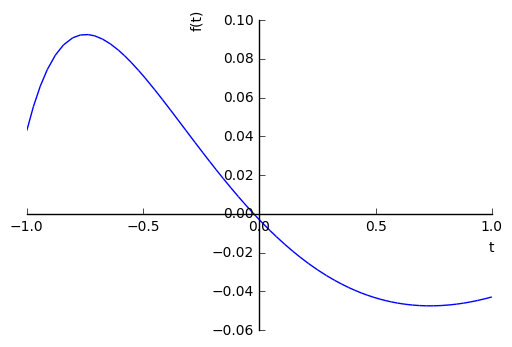

In [15]:
plot(E.subs(sols2[1]), (t, -1, 1))

In [16]:
extreme_x3 = [-1, nsolve(diff(E.subs(sols2[1]), t), -1), nsolve(diff(E.subs(sols2[1]), t), 1), 1]
extreme_x3

[-1, mpf('-0.74688544376119458'), mpf('0.73445765239847861'), 1]

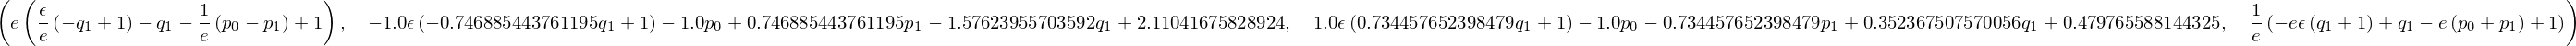

In [17]:
system3 = Tuple(*[expr.subs({i: j, t: extreme_x3[j]}) for j in range(4)]).subs(q0, 1)
system3

In [18]:
sols3 = solve(system3, [p0, p1, q1, epsilon], dict=True)
sols3

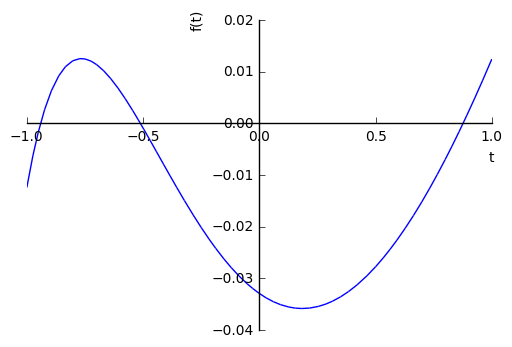

In [19]:
plot(E.subs(sols3[1]), (t, -1, 1))

In [20]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

In [21]:
extreme_x4 = [-1, nsolve(diff(E.subs(sols3[1]), t), -1), nsolve(diff(E.subs(sols3[1]), t), 1), 1]
extreme_x4

[-1, mpf('-0.76572373080496461'), mpf('0.184735503796684'), 1]

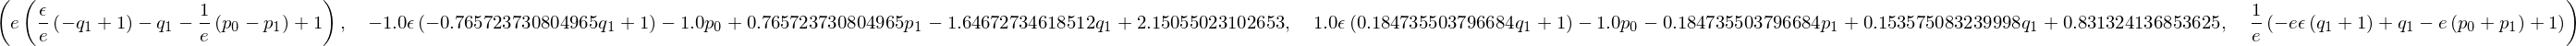

In [22]:
system4 = Tuple(*[expr.subs({i: j, t: extreme_x4[j]}) for j in range(4)]).subs(q0, 1)
system4

In [23]:
sols4 = solve(system4, [p0, p1, q1, epsilon], dict=True)
sols4

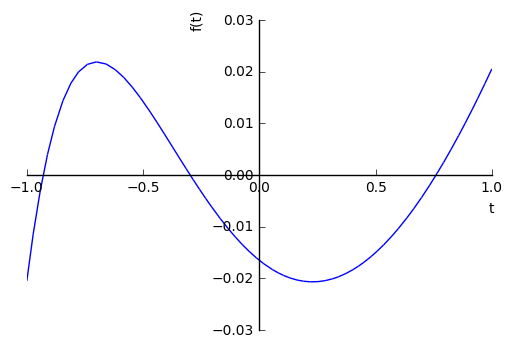

In [24]:
plot(E.subs(sols4[1]), (t, -1, 1))

In [25]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

Another useful resource: http://www.boost.org/doc/libs/1_35_0/libs/math/doc/sf_and_dist/html/math_toolkit/backgrounders/remez.html

> The method usually adopted to solve these equations is an iterative one: we guess the value of E, solve the equations to obtain a new value for E (as well as the polynomial coefficients), then use the new value of E as the next guess. The method is repeated until E converges on a stable value.

> These complications extend the running time required for the development of rational approximations quite considerably. It is often desirable to obtain a rational rather than polynomial approximation none the less: rational approximations will often match more difficult to approximate functions, to greater accuracy, and with greater efficiency, than their polynomial alternatives. For example, if we takes our previous example of an approximation to ex, we obtained 5x10-4 accuracy with an order 4 polynomial. If we move two of the unknowns into the denominator to give a pair of order 2 polynomials, and re-minimise, then the peak relative error drops to 8.7x10-5. That's a 5 fold increase in accuracy, for the same number of terms overall.

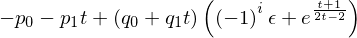

In [26]:
expr = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t)/(q0 + q1*t) + (-1)**i*epsilon
expr = expr*(q0 + q1*t)
expr = simplify(expr)
expr

In [27]:
system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(5, 4-j).evalf()}) for j in range(1,5)])

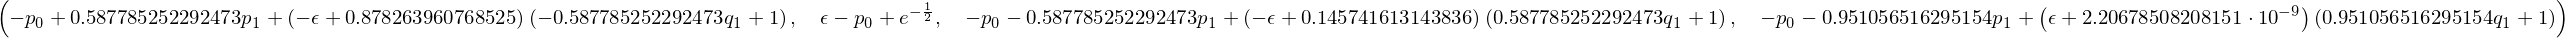

In [28]:
system = system.subs(q0, 1)
system

In [29]:
sols = solve(system, [p0, p1, q1, epsilon], dict=True)
sols

In [30]:
E = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t)/(1 + q1*t)

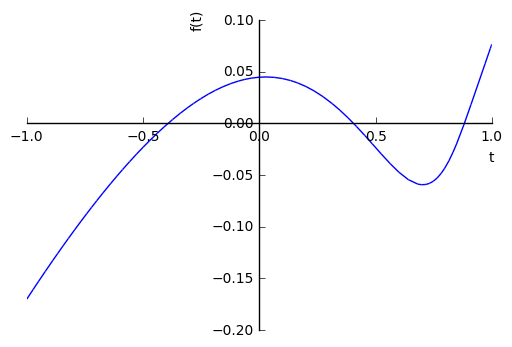

In [31]:
plot(E.subs(sols[0]), (t, -1, 1))

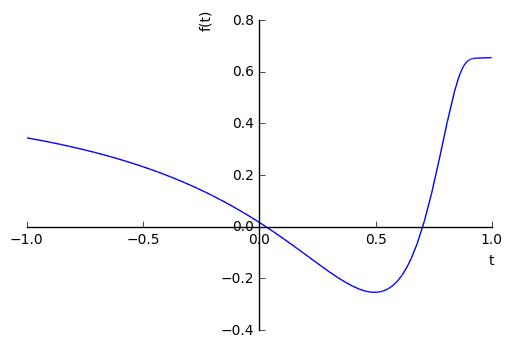

In [32]:
plot(E.subs(sols[0]).diff(t), (t, -1, 1))

In [33]:
print(E.subs(sols[0]).diff(t))

-0.0243197537608033*(-0.636658291554981*t + 0.561884537092944)/(-0.0243197537608033*t + 1)**2 + (-2*(t + 1)/(2*t - 2)**2 + 1/(2*t - 2))*exp((t + 1)/(2*t - 2)) + 0.636658291554981/(-0.0243197537608033*t + 1)


In [34]:
nsolve(diff(E.subs(sols[0]), t), (.5, 0.9), solver='bisect')

mpf('0.70295119676297064')

In [35]:
nsolve(diff(E.subs(sols[0]), t), 0.9)

mpf('0.99996577349047597')

In [36]:
E.subs(sols[0]).diff(t).subs(t, 1)

In [37]:
E.subs(sols[0]).diff(t).subs(t, 0.99996577349047597) 

This is the wrong answer. See https://github.com/sympy/sympy/issues/11768

In [38]:
E.subs(sols[0]).diff(t).subs(t, 0.7)

We have to use the weird wrong solution here, because expr(1) = infinity ???

In [39]:
extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), 0), nsolve(diff(E.subs(sols[0]), t), (0.5, .9), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), 0.9)]
extreme_x2

[-1,
 mpf('0.028158494689863673'),
 mpf('0.70295119676297064'),
 mpf('0.99996577349047597')]

In [40]:
system2 = Tuple(*[expr.subs({i: j, t: extreme_x2[j]}) for j in range(4)]).subs(q0, 1)
system2

In [41]:
sols2 = solve(system2, [p0, p1, q1, epsilon], dict=True)
sols2

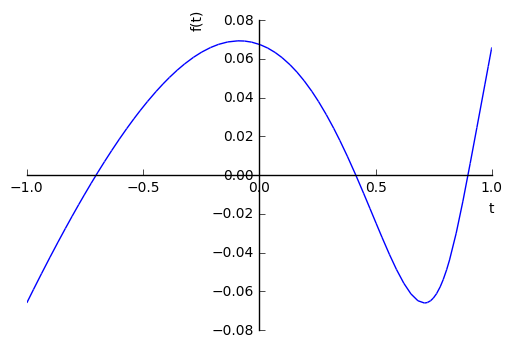

In [42]:
plot(E.subs(sols2[1]), (t, -1, 1))

In [43]:
extreme_x3 = [-1, nsolve(diff(E.subs(sols2[1]), t), -1), nsolve(diff(E.subs(sols2[1]), t), (0.5, 0.9), solver='bisect'), nsolve(diff(E.subs(sols2[1]), t), .9)]
extreme_x3

[-1,
 mpf('-0.085952974958929031'),
 mpf('0.71015320710868727'),
 mpf('0.99996569817644129')]

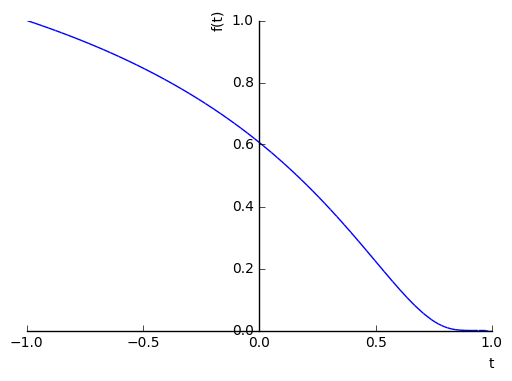

In [44]:
plot(exp(-(-t - 1)/(2*t - 2)), (t, -1, 1))

In [45]:
system3 = Tuple(*[expr.subs({i: j, t: extreme_x3[j]}) for j in range(4)]).subs(q0, 1)
system3

In [46]:
sols3 = solve(system3, [p0, p1, q1, epsilon], dict=True)
sols3

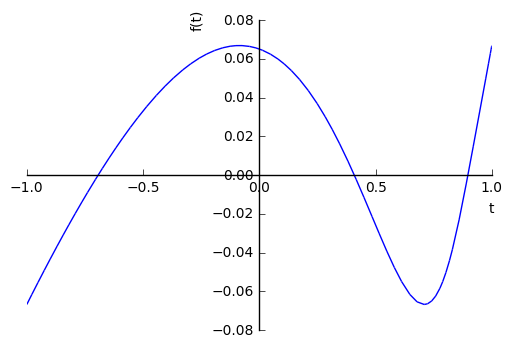

In [47]:
plot(E.subs(sols3[1]), (t, -1, 1))

In [48]:
[E.subs(sols3[1]).subs(t, i).evalf() for i in extreme_x3]

In [49]:
r = (p0 + p1*t)/(1 + q1*t)

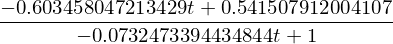

In [50]:
r.subs(sols3[1])

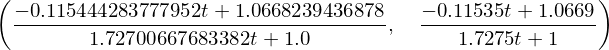

In [51]:
n, d = simplify(r.subs(sols3[1]).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom()
rat_func = (n/Poly(d).TC())/(d/Poly(d).TC())
correct_rat_func = (1.0669 + -1.1535e-1*t)/(1 + 1.7275*t)
rat_func, correct_rat_func

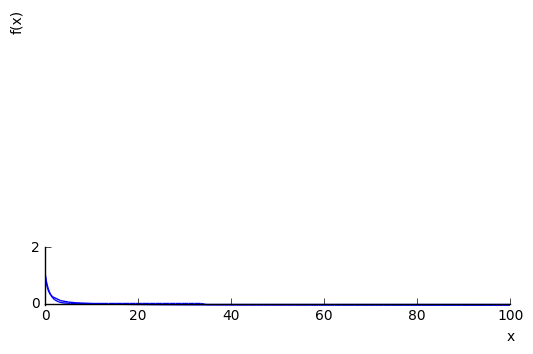

In [52]:
plot((rat_func, (t, 0, 100)), (exp(-t), (t, 0, 100)), ylim=(-1, 10))

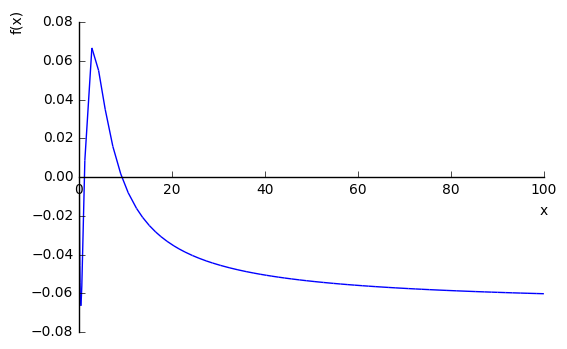

In [53]:
plot((correct_rat_func - exp(-t), (t, 0, 100)))

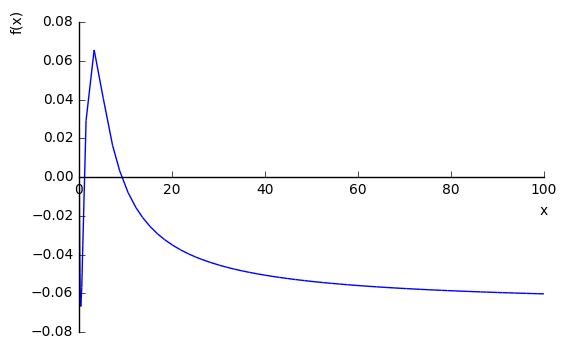

In [54]:
plot((rat_func - exp(-t), (t, 0, 100)))

That's it!!!

For reference, these are the Möbius transforms for $[-1, 1] \leftrightarrow [0, \infty]$

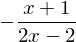

In [55]:
simplify(1/(1 - x) - S(1)/2)

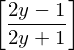

In [56]:
solve(1/(1 - x) - S(1)/2 - y, x)

Now let's try $n = 2$

Chebyshev coefficients for $e^{-x}$ for $n=1$ from Cody, Meinardus, and Varga (table III)

```
              n = 2
---------------------------------
i   p_i             q_i
---------------------------------
0   9.92641  (-01)   1.00000  ( 00)
1  -1.88332  (-01)   6.69295  (-01)
2   4.21096  (-03)   5.72258  (-01)
```

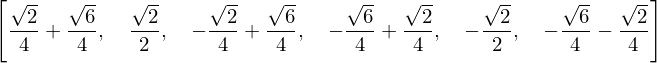

In [57]:
[chebyshevt_root(6, i) for i in range(6)]

In [58]:
epsilon = symbols("epsilon")
p0, p1, p2, q1, q2 = symbols("p0, p1, p2, q1, q2")
i = symbols("i")

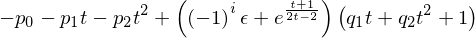

In [59]:
expr = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2) + (-1)**i*epsilon
expr = expr*(1 + q1*t + q2*t**2)
expr = simplify(expr)
expr

In [60]:
system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(7, 6-j)}) for j in range(1,7)])

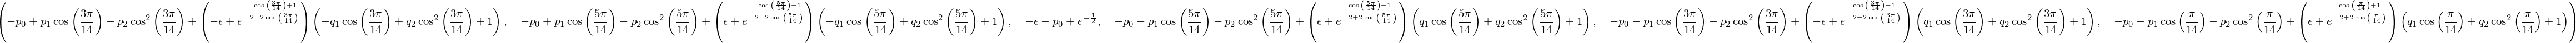

In [61]:
system = system.subs(q0, 1)
system

In [62]:
sols = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
sols

[{q2: mpf('0.50060529714594074'),
  q1: mpf('-1.2351673140964272'),
  p2: mpf('0.75984526802652071'),
  p0: mpf('0.60565545229930815'),
  epsilon: mpf('0.00087520741332527754'),
  p1: mpf('-1.3617815355355396')}]

In [63]:
E = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)

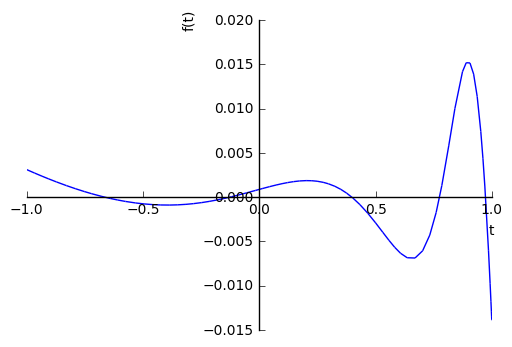

In [64]:
plot(E.subs(sols[0]), (t, -1, 1))

In [65]:
E.subs(sols[0]).subs(t, 1)

In [66]:
extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), (-1, 0), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), (0, 0.5), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), (0.5, .7), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), 0.9), 0.999]
extreme_x2

[-1,
 mpf('-0.39506511254484362'),
 mpf('0.20691058995491739'),
 mpf('0.65489012733235114'),
 mpf('0.89772666518036314'),
 0.999]

In [67]:
system2 = Tuple(*[expr.subs({i: j, t: extreme_x2[j]}) for j in range(6)]).subs(q0, 1)
system2

In [68]:
sols2 = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system2, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
sols2

[{q2: mpf('0.53709548411891743'),
  q1: mpf('-1.1458321602168974'),
  p2: mpf('0.7276521929024462'),
  p0: mpf('0.60677726907688919'),
  epsilon: mpf('-0.0061928183252491161'),
  p1: mpf('-1.3318832988753191')}]

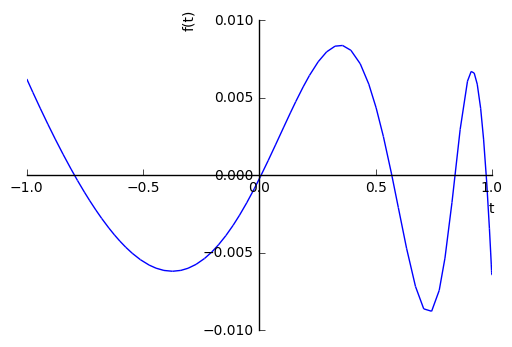

In [69]:
plot(E.subs(sols2[0]), (t, -1, 1))

In [70]:
extreme_x3 = [-1, nsolve(diff(E.subs(sols2[0]), t), (-1, 0), solver='bisect'), nsolve(diff(E.subs(sols2[0]), t), (0, 0.5), solver='bisect'), nsolve(diff(E.subs(sols2[0]), t), (0.5, .8), solver='bisect'), nsolve(diff(E.subs(sols2[0]), t), (0.8, 0.99), solver='bisect'), 0.999]
extreme_x3

[-1,
 mpf('-0.37414267499841564'),
 mpf('0.34718736920006959'),
 mpf('0.72818971396861003'),
 mpf('0.9154771862936641'),
 0.999]

In [71]:
system3 = Tuple(*[expr.subs({i: j, t: extreme_x3[j]}) for j in range(6)]).subs(q0, 1)
system3

In [72]:
sols3 = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system3, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
sols3

[{q2: mpf('0.54703815977150041'),
  q1: mpf('-1.1609647500136246'),
  p2: mpf('0.73689077745292912'),
  p0: mpf('0.60872386951896721'),
  epsilon: mpf('-0.007280358179673235'),
  p1: mpf('-1.3426730316783956')}]

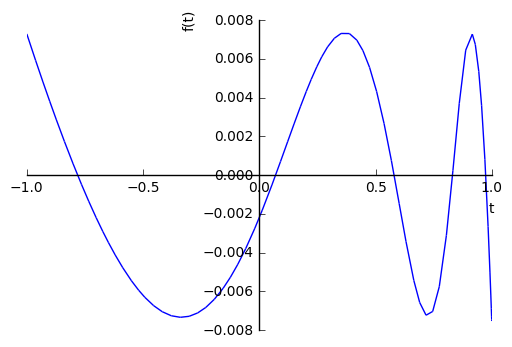

In [73]:
plot(E.subs(sols3[0]), (t, -1, 1))

In [74]:
[E.subs(sols3[0]).subs(t, i).evalf() for i in extreme_x3]

In [75]:
r = (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)

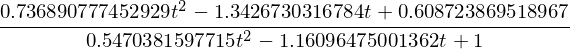

In [76]:
r.subs(sols3[0])

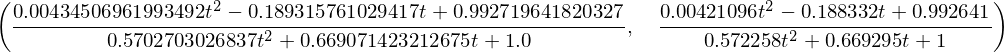

In [77]:
n, d = together(r.subs(sols3[0]).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom() # simplify/cancel here will add degree to the numerator and denominator
rat_func = (Poly(n)/Poly(d).TC())/(Poly(d)/Poly(d).TC())
correct_rat_func = (9.92641e-1 + -1.88332e-1*t + 4.21096e-3*t**2)/(1 + 6.69295e-1*t + 5.72258e-1*t**2)
rat_func, correct_rat_func

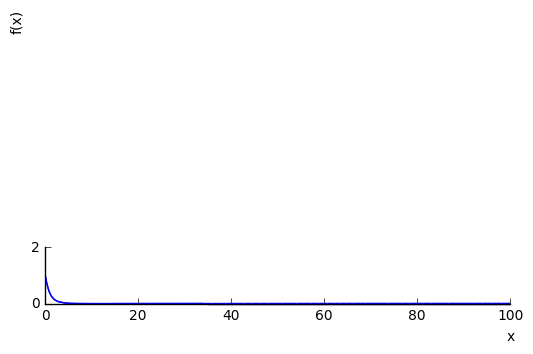

In [78]:
plot((rat_func, (t, 0, 100)), (exp(-t), (t, 0, 100)), ylim=(-1, 10))

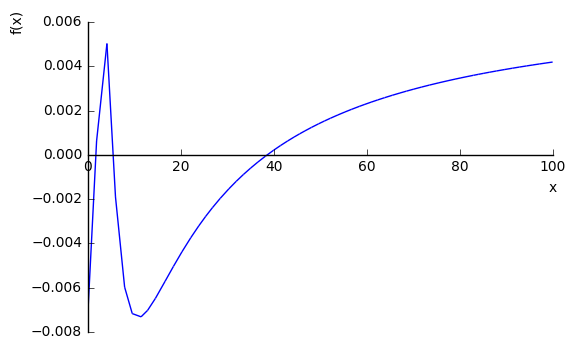

In [79]:
plot((correct_rat_func - exp(-t), (t, 0, 100)))

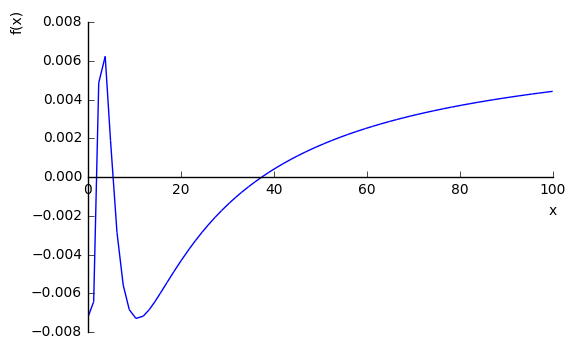

In [80]:
plot((rat_func - exp(-t), (t, 0, 100)))

In [81]:
!say done

In [82]:
N = symbols("N")
x = symbols("x", real=True)
phi = N*(0.1309 - 0.1149*x**2 + I*0.2500*x)

In [83]:
phi.subs(N, 4).as_real_imag()

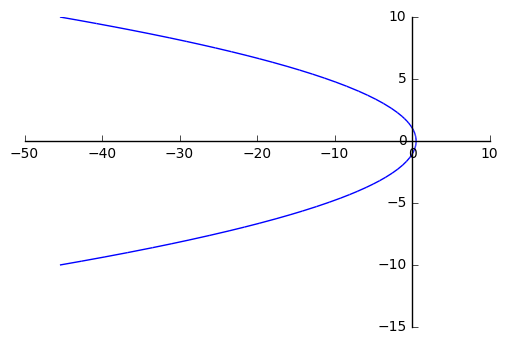

In [84]:
from sympy.plotting import *
plot_parametric((*phi.subs(N, 4).as_real_imag(), (x, -10, 10)))

In [85]:
correct_rat_func = (1.0669 + -1.1535e-1*t)/(1 + 1.7275*t)
correct_rat_func2 = (9.92641e-1 + -1.88332e-1*t + 4.21096e-3*t**2)/(1 + 6.69295e-1*t + 5.72258e-1*t**2)


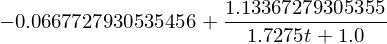

In [86]:
apart(correct_rat_func)

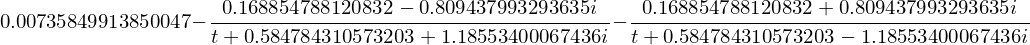

In [90]:
apart(correct_rat_func2, full=True).doit()

## $n=14$

$p_i$

```
 0   9.9999999999998168e-01
 1  -2.7495604296300043e-01
 2   3.4346984175671475e-02
 3  -2.5674439819028618e-03
 4   1.2734070715233181e-04
 5  -4.3932808492511236e-06
 6   1.0753202054485227e-07
 7  -1.8710255961089453e-09
 8   2.2849515765300155e-11
 9  -1.9038640942835345e-13
10   1.0310151365350495e-15
11  -3.3490280333667533e-18
12   5.6743825539523501e-21
13  -3.7794523874503295e-24
14   4.1609826642376613e-28
```

$q_i$

```
 1   1.0000000000000000e+00
 2   7.2504395703488666e-01
 3   2.5939094125018012e-01
 4   6.0968185127283595e-02
 5   1.0574049161691156e-02
 6   1.4405527154587316e-03
 7   1.6019211440612190e-04
 8   1.4908234724800242e-05
 9   1.1820291576355772e-06
10   8.0163997982357503e-08
11   4.8361800878648281e-09
12   2.2472030400428529e-10
13   1.2922802705792779e-11
14   1.8921838854022449e-13
15   2.2710680218891295e-14

```

In [136]:
n14pis = """
 0   9.9999999999998168e-01
 1  -2.7495604296300043e-01
 2   3.4346984175671475e-02
 3  -2.5674439819028618e-03
 4   1.2734070715233181e-04
 5  -4.3932808492511236e-06
 6   1.0753202054485227e-07
 7  -1.8710255961089453e-09
 8   2.2849515765300155e-11
 9  -1.9038640942835345e-13
10   1.0310151365350495e-15
11  -3.3490280333667533e-18
12   5.6743825539523501e-21
13  -3.7794523874503295e-24
14   4.1609826642376613e-28
"""
n14qis = """
 1   1.0000000000000000e+00
 2   7.2504395703488666e-01
 3   2.5939094125018012e-01
 4   6.0968185127283595e-02
 5   1.0574049161691156e-02
 6   1.4405527154587316e-03
 7   1.6019211440612190e-04
 8   1.4908234724800242e-05
 9   1.1820291576355772e-06
10   8.0163997982357503e-08
11   4.8361800878648281e-09
12   2.2472030400428529e-10
13   1.2922802705792779e-11
14   1.8921838854022449e-13
15   2.2710680218891295e-14
"""
n14pi = [Float(i.split()[-1]) for i in n14pis.strip().split('\n')]
n14qi = [Float(i.split()[-1]) for i in n14qis.strip().split('\n')]
n14qi[0] = 1 # Exactly
n14pi, n14qi

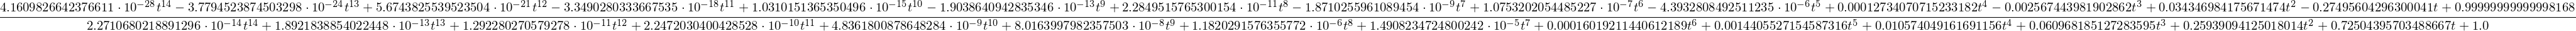

In [137]:
correct_rat_func14 = Poly(reversed(n14pi), t)/Poly(reversed(n14qi), t)
correct_rat_func14

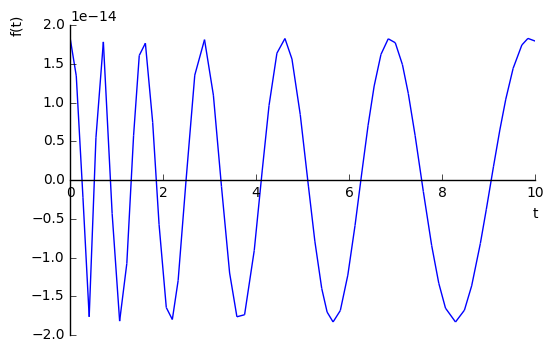

In [138]:
plot(exp(-t) - correct_rat_func14, (t, 0, 10))

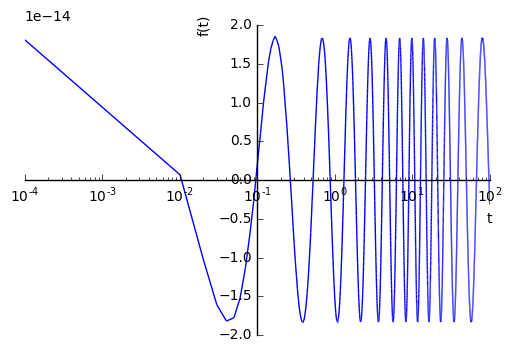

In [139]:
plot(exp(-t) - correct_rat_func14, (t, 1e-4, 1e2), xscale='log', adaptive=False, nb_of_points=10000)

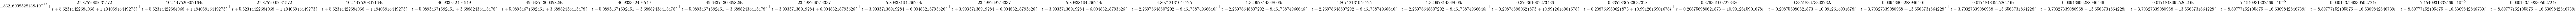

In [143]:
# Use x, which has no assumptions, to work around a bug
apart_correct_rat_func14 = apart(correct_rat_func14.subs(t, x), x, domain=QQ, full=True).doit().evalf().expand().subs(x, t)
apart_correct_rat_func14

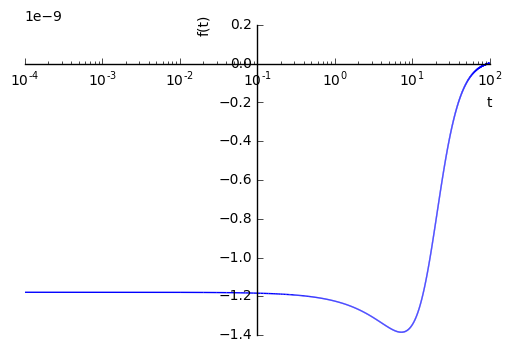

In [146]:
plot(exp(-t) - re(apart_correct_rat_func14), (t, 1e-4, 1e2), xscale='log', adaptive=False, nb_of_points=10000)

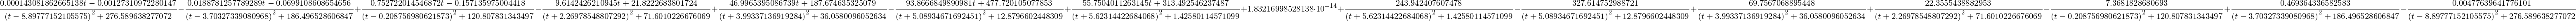

In [145]:
re(apart_correct_rat_func14)

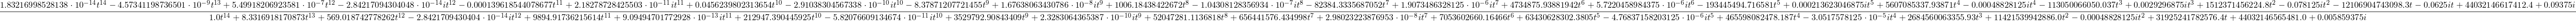

In [148]:
cancel(apart_correct_rat_func14)

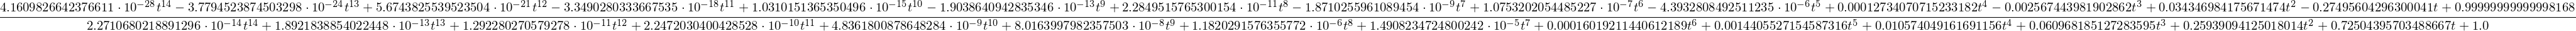

In [149]:
correct_rat_func14

In [150]:
srepr(correct_rat_func14)

"Mul(Add(Mul(Float('4.1609826642376610641e-28', prec=17), Pow(Symbol('t', real=True), Integer(14))), Mul(Integer(-1), Float('3.7794523874503297816e-24', prec=17), Pow(Symbol('t', real=True), Integer(13))), Mul(Float('5.6743825539523504126e-21', prec=17), Pow(Symbol('t', real=True), Integer(12))), Mul(Integer(-1), Float('3.3490280333667534845e-18', prec=17), Pow(Symbol('t', real=True), Integer(11))), Mul(Float('1.0310151365350495889e-15', prec=17), Pow(Symbol('t', real=True), Integer(10))), Mul(Integer(-1), Float('1.9038640942835345932e-13', prec=17), Pow(Symbol('t', real=True), Integer(9))), Mul(Float('2.2849515765300153532e-11', prec=17), Pow(Symbol('t', real=True), Integer(8))), Mul(Integer(-1), Float('1.8710255961089454423e-9', prec=17), Pow(Symbol('t', real=True), Integer(7))), Mul(Float('1.0753202054485226852e-7', prec=17), Pow(Symbol('t', real=True), Integer(6))), Mul(Integer(-1), Float('4.393280849251123483e-6', prec=17), Pow(Symbol('t', real=True), Integer(5))), Mul(Float('0.00

In [177]:
real_part14 = """       
"-8.897 773 186468 8888199 X 100 
“3.703 275 049423 448 0603 X 100
-0.208 758 638 250 130 125 l X 100
+3.993 3697105785685194 X 100 
+5.089 345 060580 6245066 X 100 
+5.623 142 572745 977 1248 X 100 
+2.269 783 8292311127097 X 100
“7.154288 0635890672853 X 10""5
+9.439 025 310736168 877 9 X 10“3 
“3.763 600 387 822 696 871 7 X 10“1 
-2.349 823 2091082701191 X 1001 
+4.693 327 448 8831293047 X 101 
~2.787516194014564646 8 X 101 
+4.807 112098 832508 8907 X 100
+1.832 174 378 254041 275 1 X 10“14
""".strip().replace(' ', '').replace('"', '-').replace('“', '-').replace('X10', 'e').replace('--', '-').replace('l', '1').replace('~', '-')
print(real_part14)

-8.8977731864688888199e0
-3.7032750494234480603e0
-0.2087586382501301251e0
+3.9933697105785685194e0
+5.0893450605806245066e0
+5.6231425727459771248e0
+2.2697838292311127097e0
-7.1542880635890672853e-5
+9.4390253107361688779e-3
-3.7636003878226968717e-1
-2.3498232091082701191e01
+4.6933274488831293047e1
-2.7875161940145646468e1
+4.8071120988325088907e0
+1.8321743782540412751e-14


In [185]:
theta1r, theta2r, theta3r, theta4r, theta5r, theta6r, theta7r, alpha1r, alpha2r, alpha3r, alpha4r, alpha5r, alpha6r, alpha7r, alpha0r = map(Float, real_part14.strip().split())
theta1r, theta2r, theta3r, theta4r, theta5r, theta6r, theta7r, alpha1r, alpha2r, alpha3r, alpha4r, alpha5r, alpha6r, alpha7r, alpha0r

In [186]:
imaginary_part14 = """
+ 1.663 098 261 990208 5304 X 101 
+ 1.365 637 187 148 3268171 X 101 
+1.0991260561901260913 X 101 
+6.004 831 642235 0373178 X 100 
+3.588 8240290270065102 X 100 
+1.194069046 343 966 9766 X 100 
+8.461 737 973 0402214019 X 100
+1.436104334954130011 1 X 10““4 
--1.718479195 848 301 751 1 X 10-2
+3.3518347029450104214 X 10""1 
-5.808 359 129714207 4004 X 100 
+4.564 364976 882 776 0791 X 101 
- 1.021 473 399 905 645 143 4 X 102 
- 1.320 979 383742 872 3881 X 100
+ 0.000 000 000 000 000 000 0 X 100
""".strip().replace(' ', '').replace('"', '-').replace('“', '-').replace('X10', 'e').replace('--', '-').replace('l', '1').replace('~', '-')
print(imaginary_part14)

+1.6630982619902085304e1
+1.3656371871483268171e1
+1.0991260561901260913e1
+6.0048316422350373178e0
+3.5888240290270065102e0
+1.1940690463439669766e0
+8.4617379730402214019e0
+1.4361043349541300111e-4
-1.7184791958483017511e-2
+3.3518347029450104214e-1
-5.8083591297142074004e0
+4.5643649768827760791e1
-1.0214733999056451434e2
-1.3209793837428723881e0
+0.0000000000000000000e0


In [187]:
theta1j, theta2j, theta3j, theta4j, theta5j, theta6j, theta7j, alpha1j, alpha2j, alpha3j, alpha4j, alpha5j, alpha6j, alpha7j, alpha0j = [Float(i)*I for i in imaginary_part14.strip().split()]
theta1j, theta2j, theta3j, theta4j, theta5j, theta6j, theta7j, alpha1j, alpha2j, alpha3j, alpha4j, alpha5j, alpha6j, alpha7j, alpha0j

In [189]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha0 =\
(r + j for r, j in zip(
        (theta1r, theta2r, theta3r, theta4r, theta5r, theta6r, theta7r, alpha1r, alpha2r, alpha3r, alpha4r, alpha5r, alpha6r, alpha7r, alpha0r),
        (theta1j, theta2j, theta3j, theta4j, theta5j, theta6j, theta7j, alpha1j, alpha2j, alpha3j, alpha4j, alpha5j, alpha6j, alpha7j, alpha0j)))

In [196]:
thetas = theta1, theta2, theta3, theta4, theta5, theta6, theta7
alphas = alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [199]:
correct_partial_frac14 = alpha0 + Add(*(alpha/(t - theta) + alpha/(t - conjugate(theta)) for alpha, theta in zip(alphas, thetas)))

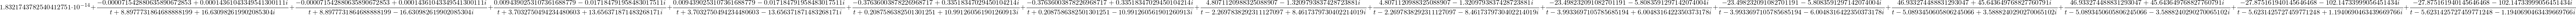

In [200]:
correct_partial_frac14

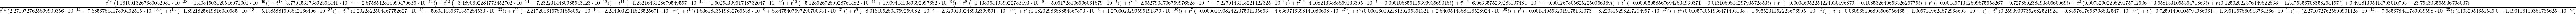

In [215]:
a, d = map(lambda i: Poly(i, t), cancel(correct_partial_frac14).as_numer_denom())
collect((a*expand_complex(1/d.TC())), t)/collect((d*expand_complex(1/d.TC())), t)

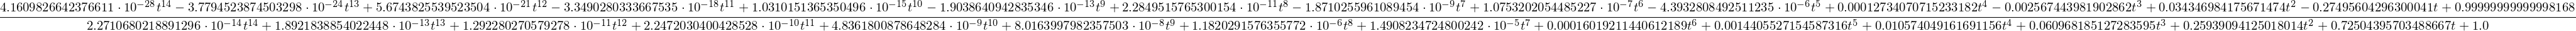

In [202]:
correct_rat_func14

There are a lot of errors here. I think there must be a lot of loss of precision. Also, I think one expression is representing $e^t$ and one $e^{-t}$, which would explain the wrong signs on the odd-powered $t$ terms.